# Final Project
Lynnee Argabright, 12/9/2023

For my final project, I developed a data narrative with US Government Grant Opportunities data, pulled from grants.gov via [Tidy Tuesday](https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-10-03/readme.md). 

I reshaped my data with the tidyr package, joined my data with dplyr, corrected for dates with the readr package, manipulated data with dplyr, adjusted factor categories with forcats, and created visualizations with ggplot2.

## Requirements

**Due date: Saturday, December 9th**

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

### Notes

*You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Reading in data
I loaded the tidyverse package and used `read_csv` to pull 2 grants datasets from Tidy Tuesday. I used `head()` to see column names and data type for each dataset, and then checked between the 2 datasets by an identical column name to check whether it could be joined.

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
grants = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-03/grants.csv',
                  show_col_types=FALSE)
grant_opportunity_details = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-03/grant_opportunity_details.csv', 
    show_col_types=FALSE)

grants |> head()
grant_opportunity_details |> head()

opportunity_id,opportunity_number,opportunity_title,agency_code,agency_name,estimated_funding,expected_number_of_awards,grantor_contact,agency_contact_phone,agency_contact_email,estimated_post_date,estimated_application_due_date,posted_date,close_date,last_updated_date_time,version,opportunity_status
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<chr>,<chr>
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,1.0e+08,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,NA,NA,2023-09-28,2024-01-08,2023-09-28 09:47:28,Synopsis 1,Posted
350292,RD-RUS-CY22DISASTERCRTA,Calendar Year 2022 Disaster Circuit Rider Technical Assistance Grants Program,USDA-RUS,Rural Utilities Service,NA,NA,Penny Douglas Grantor Phone 202-253-0504,NA,Water-RD@usda.gov,NA,NA,2023-09-28,2023-10-30,2023-09-28 09:58:28,Synopsis 8,Posted
350379,NOAA-OAR-SG-2025-23655,Fiscal Year 2025 National Sea Grant College Program Dean John A. Knauss Marine Policy Fellowship,DOC-DOCNOAAERA,DOC NOAA - ERA Production,NA,35,National Sea Grant College Program Tel: (240) 507-3712 E-mail: oar.sg.fellows@noaa.gov,NA,oar.sg.fellows@noaa.gov,NA,NA,2023-09-28,2024-02-15,2023-09-28 07:38:28,Synopsis 1,Posted
350340,CLIMATEANDTRANS,RESEARCH PARTNERSHIP ON CLIMATE CHANGE AND TRANSPORTATION,DOT-RITA,69A355 Research and Technology,2.5e+06,1,"Gretchen T. Goldman Director, Climate Change Research and Technology 202-366-6281",NA,ClimateResearch@dot.gov,NA,NA,2023-09-28,2023-11-27,2023-09-28 09:56:28,Synopsis 2,Posted
350369,23-628,Mathematical and Physical Sciences Ascending Faculty Catalyst Awards,NSF,National Science Foundation,7.5e+06,25,NSF grants.gov support grantsgovsupport@nsf.gov,NA,grantsgovsupport@nsf.gov,NA,NA,2023-09-28,NA,2023-09-28 01:00:28,Synopsis 1,Posted
350365,CP-NZB-23-001,Nicholas and Zachary Burt Memorial Carbon Monoxide Poisoning Prevention Grant Program,CPSC,Consumer Product Safety Commission,NA,100,"Grants.gov Contact Center Phone Number: 1-800-518-4726 Hours of operation are 24 hours a day, 7 days a week. The contact center is closed on federal holidays. support@grants.gov",NA,support@grants.gov,NA,NA,2023-09-28,2023-12-15,2023-09-28 12:47:28,Synopsis 1,Posted


opportunity_id,funding_opportunity_number,funding_opportunity_title,opportunity_category,opportunity_category_explanation,expected_number_of_awards,cost_sharing_or_matching_requirement,version,posted_date,last_updated_date,⋯,category_income_security,category_info,category_law,category_natural_resources,category_opportunity_zone,category_regional_development,category_science,category_transportation,category_other,category_explanation
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<date>,<date>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
40112,DHS-FEMACAPSSSE-08-001,Community Assistance Program State Support Services,Discretionary,NA,52,TRUE,1,2007-11-28,2007-11-28,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,"The purpose of the Community Assistance Program – State Support Services Element (CAP-SSSE) is to provide, through a State grant mechanism, a means to ensure that communities participating in the National Flood Insurance Program (NFIP) are achieving the flood loss reduction objectives of the NFIP. CAP-SSSE is intended to accomplish this by funding States to provide technical assistance to NFIP communities and to evaluate community performance in implementing NFIP floodplain management activities with the goal of building community and State floodplain management expertise and capability."
40113,DHS-FEMACAPSSSE-08-001,Community Assistance Program State Support Services,Discretionary,NA,52,TRUE,1,2007-11-28,2007-11-28,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,"The purpose of the Community Assistance Program – State Support Services Element (CAP-SSSE) is to provide, through a State grant mechanism, a means to ensure that communities participating in the National Flood Insurance Program (NFIP) are achieving the flood loss reduction objectives of the NFIP. CAP-SSSE is intended to accomplish this by funding States to provide technical assistance to NFIP communities and to evaluate community performance in implementing NFIP floodplain management activities with the goal of building community and State floodplain management expertise and capability."
42048,FWS-R4-FLEXFUND,Southeast Region Flex Funds,Discretionary,NA,25,FALSE,3,2008-06-17,2008-06-18,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
42423,306-08-027-RFI,Alternative Development Program,Discretionary,NA,1,FALSE,1,2008-07-22,2008-07-22,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
45657,04-563,Developing Country Collaborations in Plant Genome Research (DCC-PGR),Discretionary,NA,NA,TRUE,2,2004-03-22,2009-03-03,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,NA
45793,PD-98-1680,Ocean Technology and Interdisciplinary Coordination,Discretionary,NA,NA,FALSE,30,2009-03-05,2023-05-20,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,NA


In [28]:
#checking progress
grants|> 
    filter(opportunity_id=='40112')
grant_opportunity_details|>
    filter(opportunity_id=='40112')



opportunity_id,opportunity_number,opportunity_title,agency_code,agency_name,estimated_funding,expected_number_of_awards,grantor_contact,agency_contact_phone,agency_contact_email,estimated_post_date,estimated_application_due_date,posted_date,close_date,last_updated_date_time,version,opportunity_status
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<dbl>,<chr>
40112,DHS-FEMACAPSSSE-08-001,Community Assistance Program State Support Services,DHS-DHS,Department of Homeland Security - FEMA,7500000,52,Bianca Costa Grants Management Specialist Phone 202-786-9503,NA,Bianca.Costa@dhs.gov,NA,NA,2007-11-28,NA,2007-11-28 17:32:28,NA,Posted


opportunity_id,funding_opportunity_number,funding_opportunity_title,opportunity_category,opportunity_category_explanation,expected_number_of_awards,cost_sharing_or_matching_requirement,version,posted_date,last_updated_date,⋯,category_income_security,category_info,category_law,category_natural_resources,category_opportunity_zone,category_regional_development,category_science,category_transportation,category_other,category_explanation
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<date>,<date>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
40112,DHS-FEMACAPSSSE-08-001,Community Assistance Program State Support Services,Discretionary,NA,52,TRUE,1,2007-11-28,2007-11-28,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,"The purpose of the Community Assistance Program – State Support Services Element (CAP-SSSE) is to provide, through a State grant mechanism, a means to ensure that communities participating in the National Flood Insurance Program (NFIP) are achieving the flood loss reduction objectives of the NFIP. CAP-SSSE is intended to accomplish this by funding States to provide technical assistance to NFIP communities and to evaluate community performance in implementing NFIP floodplain management activities with the goal of building community and State floodplain management expertise and capability."


## Reshaping the data
I used pivot_longer to reshape the grants_opportunity_details dataset so that the categories are all in a single column.

In [29]:
category =(c(
    'category_agriculture','category_arts','category_business','category_community_development','category_consumer_protection',
    'category_disaster','category_education','category_employment','category_energy','category_environment','category_food',
    'category_health','category_housing','category_humanities','category_iija','category_income_security','category_info',
    'category_law','category_natural_resources','category_opportunity_zone','category_regional_development','category_science',
    'category_transportation','category_other'
    ))
details=grant_opportunity_details%>%
    mutate(award_ceiling=as.numeric(award_ceiling),
          award_ceiling=format(award_ceiling, scientific=FALSE))|> #to get rid of scientific notation such as '2.5e+08'
    pivot_longer(all_of(category),
                names_to='Category',
                values_to='Is_it_this_category')|>
    arrange(Category)

# details |> colnames()
# details |> head()

## Joining the data
I first adjusted some of the data types for the columns so they would be compatible for joining between the two datasets. I then joined the data. After that, I started prepping the new joined dataset for overall demands I wanted to explore--grant opportunities available for public higher education institutions, and cleaned up the reshaped data column so it would only contain the TRUE Boolean values.

In [30]:
grants=grants |> 
     mutate(expected_number_of_awards = as.numeric(expected_number_of_awards),
           version = as.numeric(version), #adjusting so both datasets have the identical data type for this column
           estimated_funding=format(estimated_funding, scientific=FALSE)) #to get rid of scientific notation such as '2.5e+08'
     #filter(opportunity_id=='40112') #checking to test progress

#grants|> pull(expected_number_of_awards) #this was something I was trying out in future parts, so I wanted to check progress

In [31]:
grants_by_funder = grants %>% inner_join(details, by='opportunity_id')
grants_by_funder |> head()
grants_by_funder |> colnames()

opportunity_id,opportunity_number,opportunity_title,agency_code,agency_name.x,estimated_funding,expected_number_of_awards.x,grantor_contact,agency_contact_phone,agency_contact_email,⋯,eligibility_unrestricted,additional_information_on_eligibility,funding_cooperative_agreement,funding_grant,funding_procurement_contract,funding_other,cfda_numbers,category_explanation,Category,Is_it_this_category
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<lgl>
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_agriculture,FALSE
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_arts,FALSE
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_business,FALSE
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_community_development,FALSE
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_consumer_protection,FALSE
350373,EPA-R-OCSPP-OPPT-FY2023-001,Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,EPA,Environmental Protection Agency,100000000,40,embodiedcarbon@epa.gov,NA,embodiedcarbon@epa.gov,⋯,FALSE,See Section III of the funding opportunity for eligibility information.,TRUE,TRUE,FALSE,FALSE,66.721 -- Reducing Embodied Greenhouse Gas Emissions for Construction Materials and Products,NA,category_disaster,FALSE


[1] "opportunity_id"                                                     
 [2] "opportunity_number"                                                 
 [3] "opportunity_title"                                                  
 [4] "agency_code"                                                        
 [5] "agency_name.x"                                                      
 [6] "estimated_funding"                                                  
 [7] "expected_number_of_awards.x"                                        
 [8] "grantor_contact"                                                    
 [9] "agency_contact_phone"                                               
[10] "agency_contact_email"                                               
[11] "estimated_post_date"                                                
[12] "estimated_application_due_date"                                     
[13] "posted_date.x"                                                      
[14] "close_date"                                                         
[15] "last_updated_date_time"                                             
[16] "version.x"                                                          
[17] "opportunity_status"                                                 
[18] "funding_opportunity_number"                                         
[19] "funding_opportunity_title"                                          
[20] "opportunity_category"                                               
[21] "opportunity_category_explanation"                                   
[22] "expected_number_of_awards.y"                                        
[23] "cost_sharing_or_matching_requirement"                               
[24] "version.y"                                                          
[25] "posted_date.y"                                                      
[26] "last_updated_date"                                                  
[27] "original_closing_date_for_applications"                             
[28] "current_closing_date_for_applications"                              
[29] "archive_date"                                                       
[30] "estimated_total_program_funding"                                    
[31] "award_ceiling"                                                      
[32] "award_floor"                                                        
[33] "agency_name.y"                                                      
[34] "description"                                                        
[35] "link_to_additional_information"                                     
[36] "grantor_contact_information"                                        
[37] "eligibility_individuals"                                            
[38] "eligibility_state_governments"                                      
[39] "eligibility_county_governments"                                     
[40] "eligibility_independent_school_districts"                           
[41] "eligibility_city_or_township_governments"                           
[42] "eligibility_special_district_governments"                           
[43] "eligibility_native_american_tribal_governments_federally_recognized"
[44] "eligibility_native_american_tribal_organizations_other"             
[45] "eligibility_nonprofits_501c3"                                       
[46] "eligibility_nonprofits_non_501c3"                                   
[47] "eligibility_for_profit"                                             
[48] "eligibility_small_businesses"                                       
[49] "eligibility_private_institutions_of_higher_education"               
[50] "eligibility_public_institutions_of_higher_education"                
[51] "eligibility_public_indian_housing_authorities"                      
[52] "eligibility_others"                                                 
[53] "eligibility_unrestricted"                                           
[54] "additional_informati

In [34]:
grants_by_funder=grants_by_funder |>
          filter(funding_grant=='TRUE',
          eligibility_public_institutions_of_higher_education=='TRUE', 
          Is_it_this_category=='TRUE')  #so only the categories that each grant applies to will appear

In [33]:
#grants_by_funder |>summary() #I was using this to check how many observations each column contained

####This was something I was trying to manipulate, in order to create a viz by agency_name, but I kept getting this error: 
####"Error in UseMethod("arrange"): no applicable method for 'arrange' applied to an object of class "function"
# agency_df=grants_by_funder |>
#         group_by(agency_name.x)|>
#         mutate(n=n())|>
#         ungroup()
#         arrange(n)|>
#         mutate(agency_sorted=fct_inorder(agency_name.x))
# agency_df|> head()
# ggplot(agency_df, aes(x = agency_sorted))+
#     geom_bar() + 
#     coord_flip()


####This was something I was trying to manipulate, in order to simplify the agency name listings so they could be better visualized,
####but I kept getting the error that agency_names.x didn't exist...?
#### I had chosen the shortlist of agency names by the number of grant opportunity offerings (column 'expected_number_of_awards').
#grants_by_funder |>
          # mutate(agency.simple = ifelse(
          #       agency_name.x %in% c('Air Force Office of Scientific Research', 'Rural Business-Cooperative Service',
          #                            'Department of Housing and Urban Development', 'Economic Development Administration',
          #                            'National Science Foundation'),
          #        agency.name.x, 'Other')) 


## Updating Dates
I wanted to create a visualization by year that grant opportunities came out, so I needed to separate out the year to make this column more comparable. I had also been testing out how to compare the amount of the award opportunity to the year the opportunity came out. I made a table of this second exploration instead of a graph because I kept getting a graph error of using discrete data instead of continuous.

In [15]:
library("lubridate")
grants_by_year=grants_by_funder |>
    select(opportunity_id, agency_name.x, posted_date.x, award_ceiling)|>
    #filter(award_ceiling!="NA")|>
    mutate(posted_date.x=year(posted_date.x))|>
    arrange(desc(posted_date.x))
grants_by_year |> pull(posted_date.x) |> table()
grants_by_year |> head()


2016 2018 2019 2020 2021 2022 2023 
   1    8    3  183  318  389  626 

opportunity_id,agency_name.x,posted_date.x,award_ceiling
<dbl>,<chr>,<dbl>,<chr>
350383,National Institutes of Health,2023,650000
350389,National Institutes of Health,2023,NA
350389,National Institutes of Health,2023,NA
350390,Fish and Wildlife Service,2023,750000
347843,Rural Housing Service,2023,250000
347843,Rural Housing Service,2023,250000


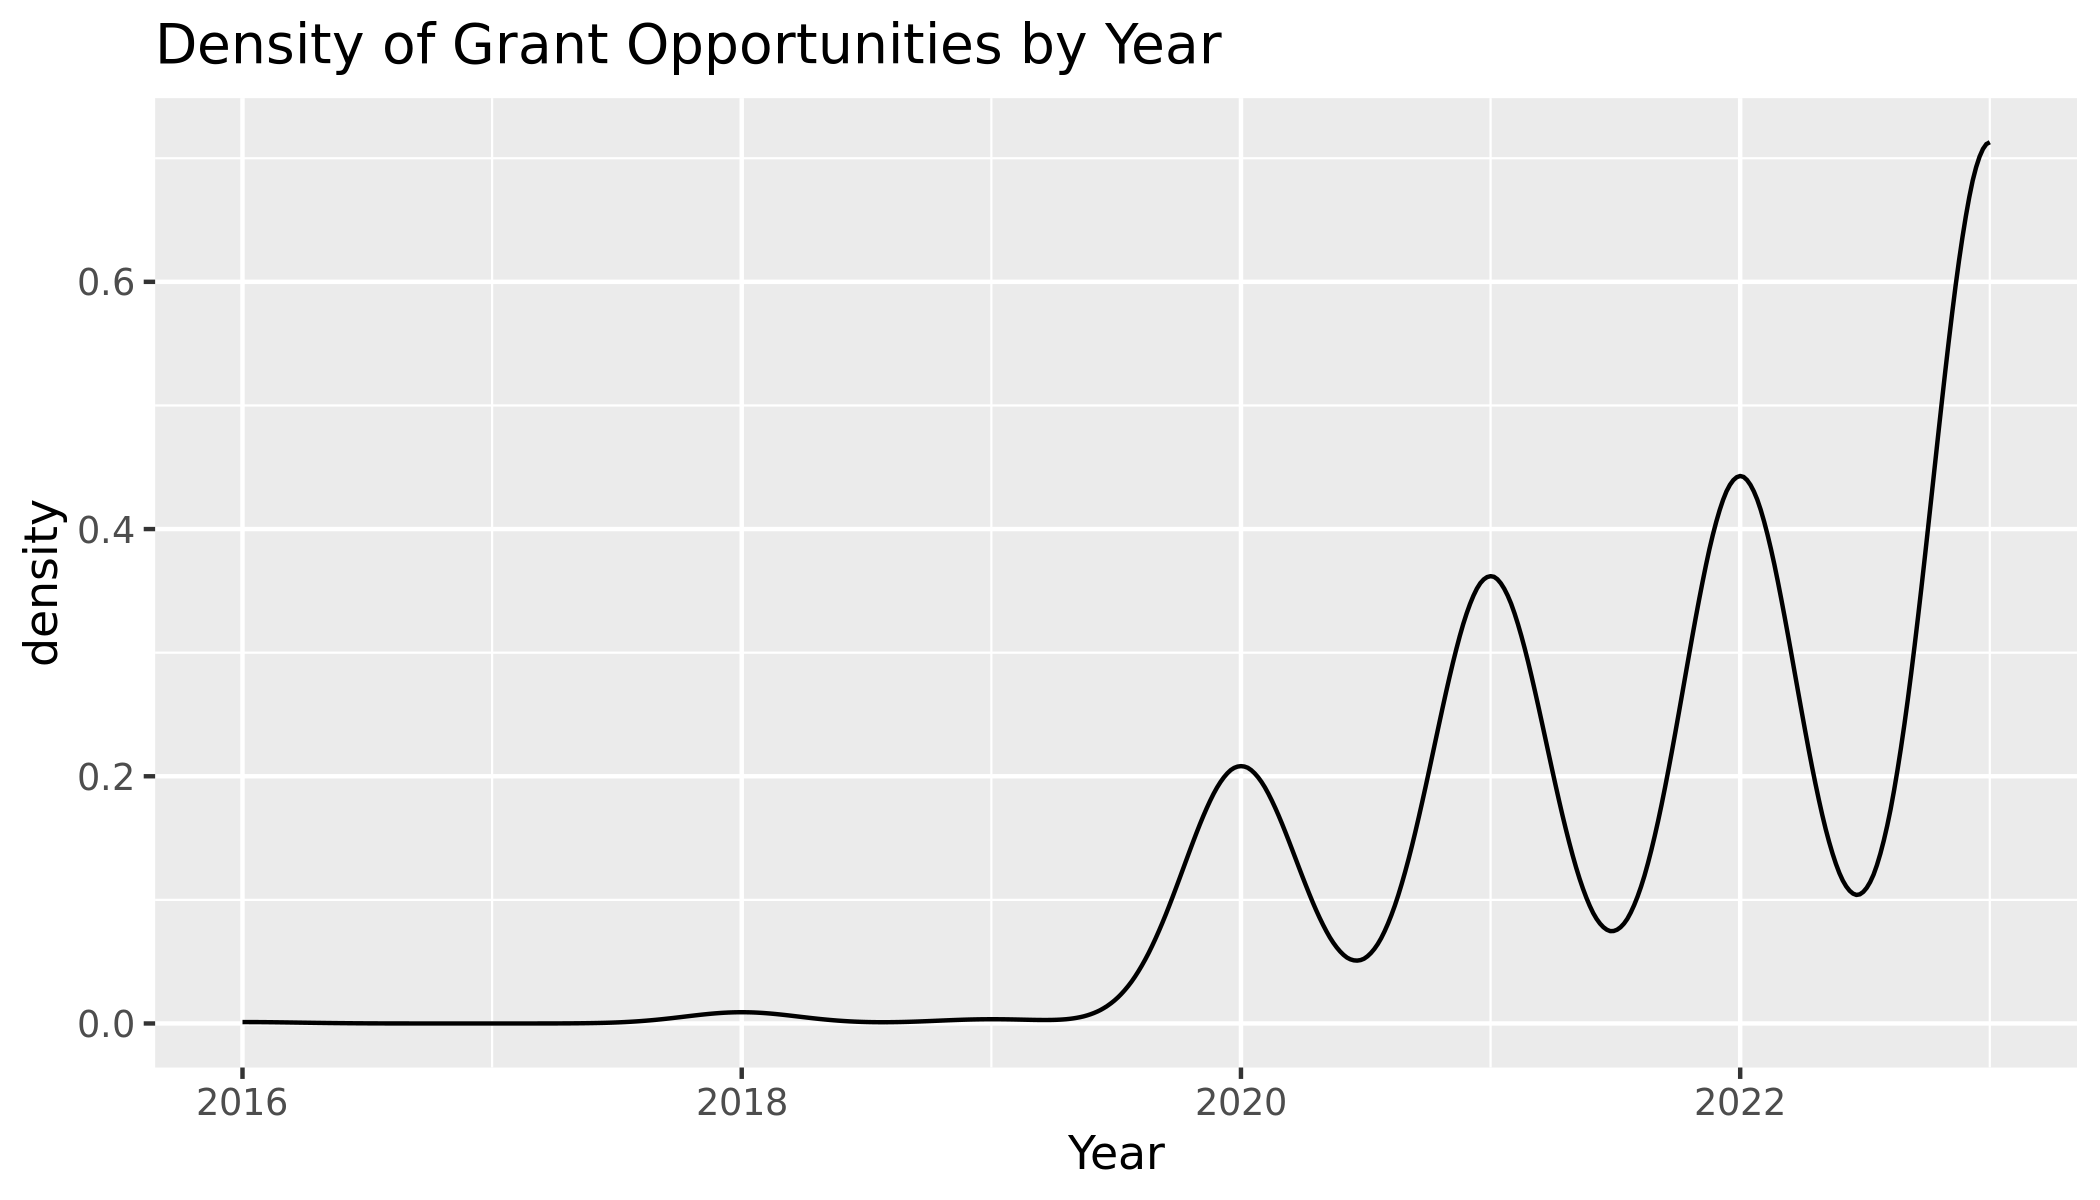

In [49]:
library("scales")
options(repr.plot.height=4)
ggplot(grants_by_year, aes(x=posted_date.x))+
        geom_density()+
        labs(x="Year",title="Density of Grant Opportunities by Year")

In [21]:
grants_by_num_awards=grants_by_funder |>
    group_by(agency_name.x, expected_number_of_awards.y)|>
    filter(award_ceiling !="NA", award_floor!="NA", expected_number_of_awards.y!="NA")|>
    #summarize(N=n())|>
    count(agency_name.x)|>
    arrange(desc(expected_number_of_awards.y))
grants_by_num_awards

agency_name.x,expected_number_of_awards.y,n
<chr>,<dbl>,<int>
Air Force Office of Scientific Research,999999,1
Economic Development Administration,3000,1
Rural Business-Cooperative Service,900,4
Forest Service,500,2
Air Force Office of Scientific Research,200,1
Economic Development Administration,150,1
Health Resources and Services Administration,103,1
AFRL Kirtland AFB,100,1
Department of Defense,100,1


## Factoring data
Finally, I was curious about the number of categories these grant opportunities were classified within. I found the order of the categories and then lumped into an "other" category anything that wasn't in the top 5 most frequently used categories. I had originally been interested in comparing the categories offered against the grant agency offering the grants, but this turned out to be not interesting data, as the HUGE majority came from the National Institutes of Health.



                   Other            category_food     category_environment 
                     106                       68                      101 
category_income_security       category_education          category_health 
                     137                      337                      779 

[1] "Other"                    "category_food"           
[3] "category_environment"     "category_income_security"
[5] "category_education"       "category_health"

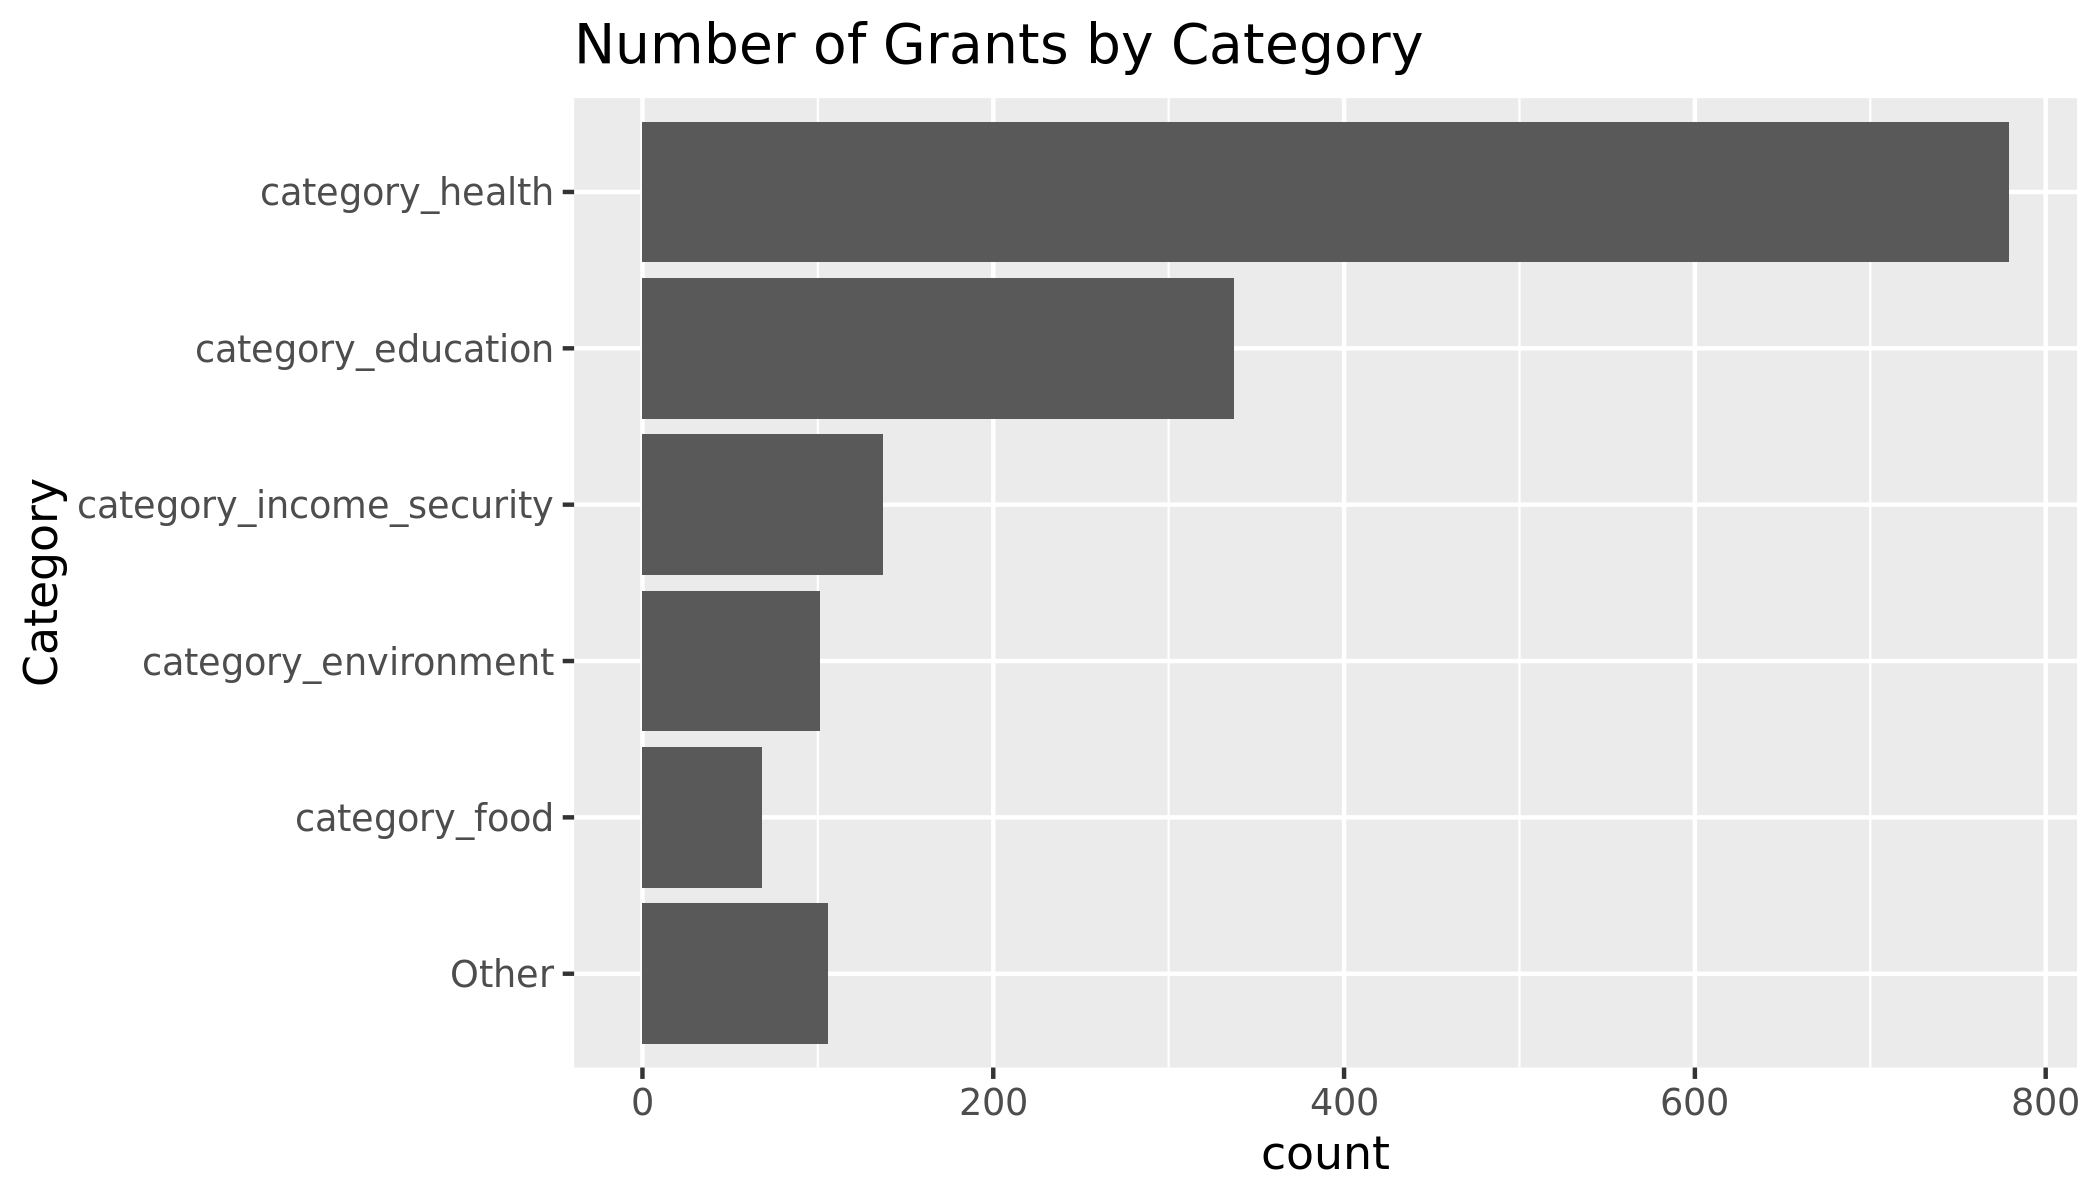

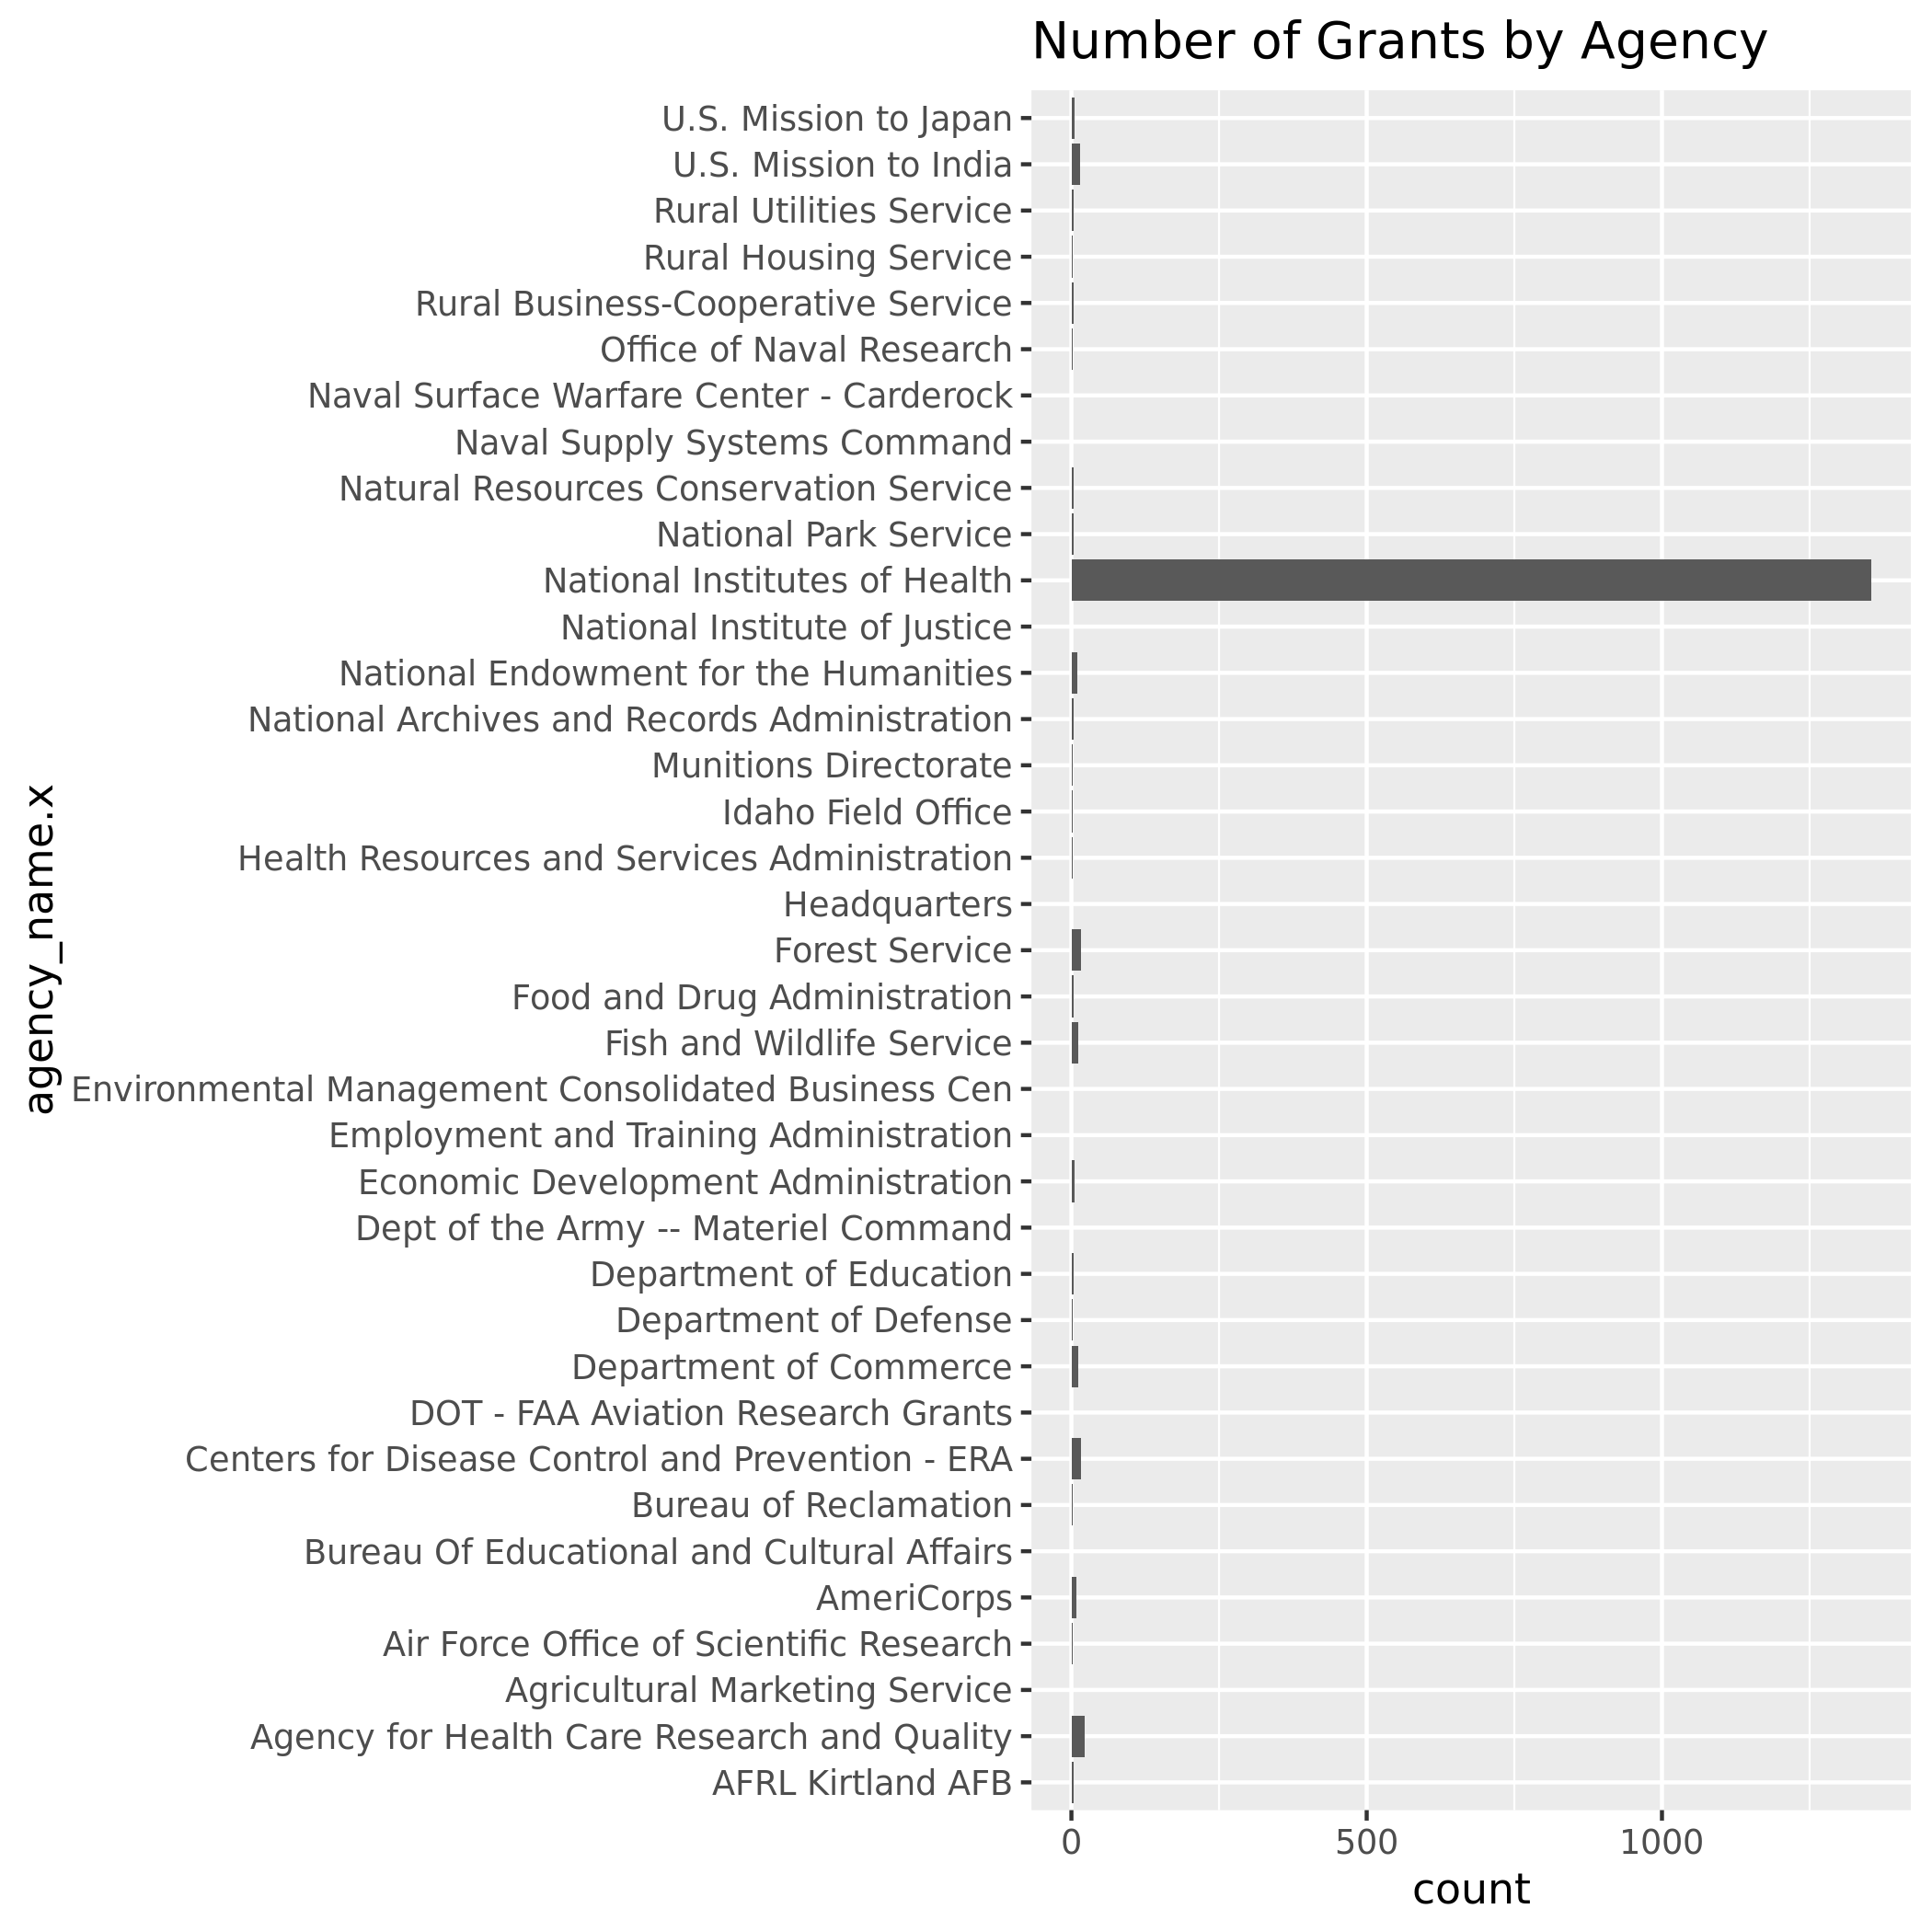

In [47]:
details_HE= grants_by_funder|>
            mutate(Category=Category |>
            fct_lump(n=5) |> #show only the top 5 categories
            fct_infreq() |> #the largest value is the first level
            fct_rev()|>
            fct_relevel('Other', after=0))
details_HE |>pull(Category) |> table()
details_HE |>pull(Category) |> levels()

options(repr.plot.res=300, repr.plot.height=4)
ggplot(details_HE, aes(y=Category)) +
        geom_bar()+
        labs(title="Number of Grants by Category")

options(repr.plot.res=300, repr.plot.height=7)
ggplot(details_HE, aes(y=agency_name.x))+
    geom_bar()+
    #facet_wrap(~Category, 1)+
    labs(title="Number of Grants by Agency")